In [1]:
%matplotlib inline

In [2]:
import numpy as np

positive_label = 1 # The label that we call correct.

# An example set of labels for our ground truth
gt_labels    = np.array([1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])

# Some example output from a classifier (i.e. model), with classification errors.
model_output = np.array([1,1,2,2,2,1,1,1,2,1,2,2,2,2,2,2,1,2,1,2])

In [3]:
# Compute the number of true positives# Comput 
tp = sum((model_output == gt_labels) * (gt_labels == positive_label) + 0.0)
# Determine precision by dividing the true positive count by the number of all claimed as positive.
precision = tp / sum((model_output == positive_label) + 0.0)
precision

0.75

In [4]:
fp = sum((model_output == positive_label) * (gt_labels != positive_label) + 0.0)
fp

2.0

In [5]:
fn = sum((model_output != positive_label) * (gt_labels == positive_label) + 0.0)
fn

4.0

In [6]:
recall = tp / (tp + fn)
recall

0.6

In [7]:
f_score = 2 * precision * recall / (precision + recall)
f_score

0.6666666666666665

In [8]:
import numpy as np
from sklearn.metrics import roc_curve
roc_curve?

In [9]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
scores = (model_output == gt_labels) + 0.0
print (scores)

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(gt_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
[0.  0.8 1. ]
[0.  0.6 1. ]
[2. 1. 0.]


In [10]:
import numpy as np
from sklearn.metrics import roc_auc_score, auc

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc = roc_auc_score(y_true, y_scores)
roc_auc

0.75

In [11]:
binary_labels = (gt_labels == positive_label) + 0
print (binary_labels)
roc_auc = roc_auc_score(binary_labels, scores)

roc_auc

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


0.39999999999999997

In [12]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.39999999999999997

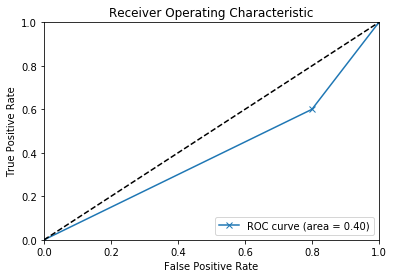

In [13]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()